# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:

df = pd.read_csv("IBM_HR_Attrition_Rate_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Determining how many employees were affected by attrition

Text(0, 0.5, 'Count')

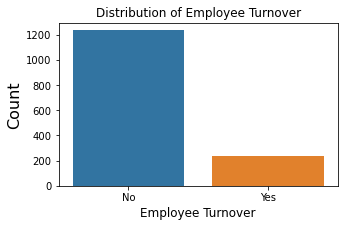

In [8]:
plt.figure(figsize=(5,3))
Attrition=df.Attrition.value_counts()

sb.barplot(x=Attrition.index ,y=Attrition.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=12)
plt.ylabel('Count', fontsize=16)

# To further determine what department was affected most by attrition

In [9]:
#Determining the 'Yes' & 'No' tally from the Department column
dept_field = pd.DataFrame(df.groupby(['Department', 'Attrition'])['DailyRate'].count())
dept_field.reset_index(inplace=True)
dept_field.columns = ['dept', 'retrenched', 'count']
dept_field

,dept,retrenched,count
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [10]:
#Moving forward to creating a plot for the tally:
# Creating 4 lists of 3 items

labels = dept_field.retrenched.unique()

hrs_count = dept_field[dept_field.dept == 'Human Resources']['count']
rd_count = dept_field[dept_field.dept == 'Research & Development']['count']
sls_count = dept_field[dept_field.dept == 'Sales']['count']

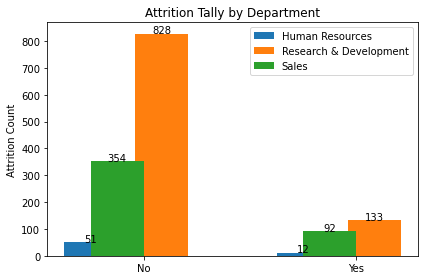

In [11]:
#labels

x = np.arange(len(labels))  

#bar width

width = 0.25  

#plot assignment

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/1, hrs_count, width, label='Human Resources')
rects2 = ax.bar(x + width/3, rd_count, width, label='Research & Development')
rects3 = ax.bar(x - width/2, sls_count, width, label='Sales')

# Assigning texts for labels, title and custom x-axis tick labels:
ax.set_ylabel('Attrition Count')
ax.set_title('Attrition Tally by Department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height, ), xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# To further determine 'Yes' & 'No' tally in the EducationField column

In [12]:
#Determining the 'Yes' & 'No' tally from the 'EducationField' column:

edu_field = pd.DataFrame(df.groupby(['EducationField', 'Attrition'])['DailyRate'].count())
edu_field.reset_index(inplace=True)
edu_field.columns = ['education_field', 'retrenched', 'count']
edu_field

,education_field,retrenched,count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


In [13]:
# Confirming Attrition Tally within the DataSet
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
# Creating 7 lists of 6 items

labels = edu_field.retrenched.unique()

hr_count = edu_field[edu_field.education_field == 'Human Resources']['count']
lifsci_count = edu_field[edu_field.education_field == 'Life Sciences']['count']
mktg_count = edu_field[edu_field.education_field == 'Marketing']['count']
med_count = edu_field[edu_field.education_field == 'Medical']['count']
other_count = edu_field[edu_field.education_field == 'Other']['count']
tech_count = edu_field[edu_field.education_field == 'Technical Degree']['count']

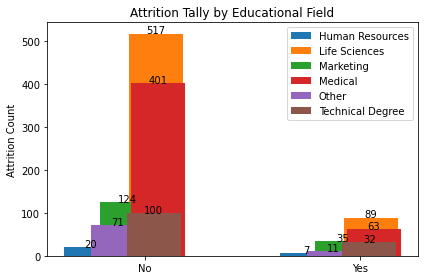

In [15]:
x = np.arange(len(labels))  

#bar width
width = 0.25  

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/1, hr_count, width, label='Human Resources')
rects2 = ax.bar(x + width/5, lifsci_count, width, label='Life Sciences')
rects3 = ax.bar(x - width/3, mktg_count, width, label='Marketing')
rects4 = ax.bar(x + width/4, med_count, width, label='Medical')
rects5 = ax.bar(x - width/2, other_count, width, label='Other')
rects6 = ax.bar(x + width/6, tech_count, width, label='Technical Degree')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attrition Count')
ax.set_title('Attrition Tally by Educational Field')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

In [16]:
genderpr = pd.DataFrame(df.groupby(['Gender', 'PerformanceRating'])['DailyRate'].count())
genderpr.reset_index(inplace=True)
genderpr.columns = ['gender', 'rating', 'count']
genderpr

,gender,rating,count
0,Female,3,494
1,Female,4,94
2,Male,3,750
3,Male,4,132


In [17]:
# Confirming Rating Amounts within the DataSet
df.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [18]:
# Creating 3 lists of 2 items
labels = genderpr.rating.unique()
male_count = genderpr[genderpr.gender == 'Male']['count']
female_count = genderpr[genderpr.gender == 'Female']['count']

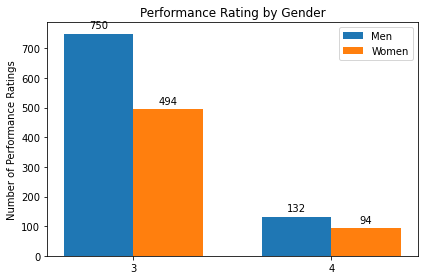

In [19]:
x = np.arange(len(labels))  # the label performance rating
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label='Men')
rects2 = ax.bar(x + width/2, female_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Performance Ratings')
ax.set_title('Performance Rating by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
#Display an overview of the Department column
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [22]:
#Display an overview of the EducationField column
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [23]:
department_sort = pd.DataFrame(df.groupby(['Department'])['Attrition'].count())
department_sort.reset_index(inplace=True)
department_sort.head()

,Department,Attrition
0,Human Resources,63
1,Research & Development,961
2,Sales,446


In [24]:
department_sort1 = pd.DataFrame(df.groupby(['EducationField'])['Attrition'].count())
department_sort1.reset_index(inplace=True)
department_sort1

,EducationField,Attrition
0,Human Resources,27
1,Life Sciences,606
2,Marketing,159
3,Medical,464
4,Other,82
5,Technical Degree,132


# Further plots to see more relashionships

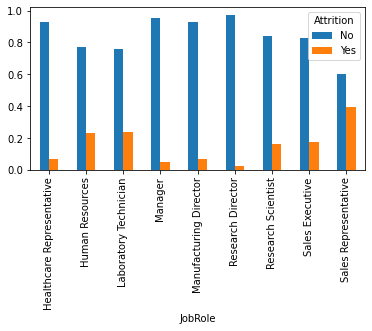

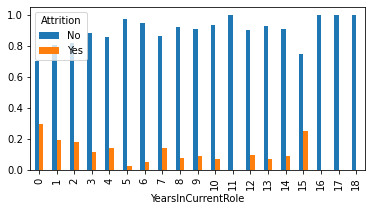

In [25]:
BarPlot_columns = ['JobRole','YearsInCurrentRole']

# Method to Perform Bar Plots
def Bar_plots(var):
    col = pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = False, figsize = (6,3))
    plt.xticks(rotation = 90)
    
for col in BarPlot_columns:
    Bar_plots(col)